In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Pokemon.csv")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
num_col = df.select_dtypes(include = ['int','float'])

In [ ]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
df.corr()

<ipython-input-78-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


<ipython-input-79-4c84db58efd5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap = 'coolwarm')


<Axes: >

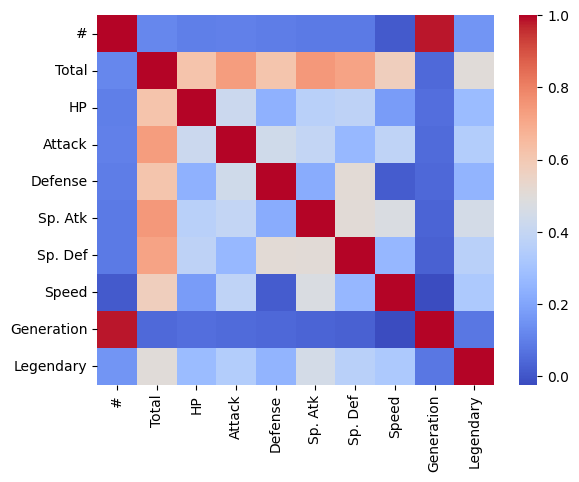

In [ ]:
sns.heatmap(df.corr(),cmap = 'coolwarm')

In [ ]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
df['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [ ]:
df[df.Defense == df.Defense.max()].shape[0]

3

In [ ]:
df[df.Generation == 5].shape[0]

165

In [ ]:
df.fillna(value="None",inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_col = df.select_dtypes(include='object')
le = LabelEncoder()
for i in cat_col:
  encoder = le.fit_transform(df[i])
  df[i] = encoder
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,80,9,14,318,45,49,49,65,65,45,1,False
1,2,329,9,14,405,60,62,63,80,80,60,1,False
2,3,745,9,14,525,80,82,83,100,100,80,1,False
3,3,746,9,14,625,80,100,123,122,120,80,1,False
4,4,102,6,12,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,160,15,4,600,50,100,150,100,150,50,6,True
796,719,161,15,4,700,50,160,110,160,110,110,6,True
797,720,314,14,8,600,80,110,60,150,130,70,6,True
798,720,315,14,1,680,80,160,60,170,130,80,6,True


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Legendary','Name','#'],axis=1)
y=df.Legendary
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8916666666666667

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.91      0.97      0.94       219
        True       0.14      0.05      0.07        21

    accuracy                           0.89       240
   macro avg       0.53      0.51      0.51       240
weighted avg       0.85      0.89      0.87       240



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred_rfc = rfc.predict(x_test)

accuracy_score(y_test, y_pred_rfc)

0.9333333333333333

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

       False       0.96      0.97      0.96       219
        True       0.63      0.57      0.60        21

    accuracy                           0.93       240
   macro avg       0.80      0.77      0.78       240
weighted avg       0.93      0.93      0.93       240



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred_dtc = dtc.predict(x_test)

accuracy_score(y_test, y_pred_dtc)

0.925

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96       219
        True       0.57      0.57      0.57        21

    accuracy                           0.93       240
   macro avg       0.77      0.77      0.77       240
weighted avg       0.93      0.93      0.93       240



In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_dtc)
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]
Sensitivity = TP / (TP + FN)
print("Sensitivity:", Sensitivity)
misclassified = (FP + FN)
print("misclassified:", misclassified)

Sensitivity: 0.5714285714285714
misclassified: 18
